In [116]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [117]:
penguins = pd.read_csv('../Datasets/penguins_size.csv')

In [118]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


## #Exploratory Data Analysis

In [119]:
penguins.isna().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [129]:
penguins.dropna(inplace=True)

In [130]:
penguins.isna().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [131]:
penguins.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


In [132]:
penguins.groupby('sex').describe().transpose()

sex                           .       FEMALE         MALE
culmen_length_mm  count     1.0   165.000000   168.000000
                  mean     44.5    42.096970    45.854762
                  std       NaN     4.903476     5.366896
                  min      44.5    32.100000    34.600000
                  25%      44.5    37.600000    40.975000
                  50%      44.5    42.800000    46.800000
                  75%      44.5    46.200000    50.325000
                  max      44.5    58.000000    59.600000
culmen_depth_mm   count     1.0   165.000000   168.000000
                  mean     15.7    16.425455    17.891071
                  std       NaN     1.795681     1.863351
                  min      15.7    13.100000    14.100000
                  25%      15.7    14.500000    16.075000
                  50%      15.7    17.000000    18.450000
                  75%      15.7    17.800000    19.250000
                  max      15.7    20.700000    21.500000
flipper_length_mm count     1.0   165.000000   168.000000
                  mean    217.0   197.363636   204.505952
                  std       NaN    12.500776    14.547876
                  min     217.0   172.000000   178.000000
                  25%     217.0   187.000000   193.000000
                  50%     217.0   193.000000   200.500000
                  75%     217.0   210.000000   219.000000
                  max     217.0   222.000000   231.000000
body_mass_g       count     1.0   165.000000   168.000000
                  mean   4875.0  3862.272727  4545.684524
                  std       NaN   666.172050   787.628884
                  min    4875.0  2700.000000  3250.000000
                  25%    4875.0  3350.000000  3900.000000
                  50%    4875.0  3650.000000  4300.000000
                  75%    4875.0  4550.000000  5312.500000
                  max    4875.0  5200.000000  6300.000000

In [133]:
## As per above result we can say that Sex column null value we can fill by 'Female'
penguins.sex.unique()

array(['MALE', 'FEMALE', '.'], dtype=object)

In [134]:
penguins[penguins['sex']=='.']

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,.


In [136]:
penguins.sex.replace('.','FEMALE',inplace=True)

In [137]:
penguins.sex.unique()

array(['MALE', 'FEMALE'], dtype=object)

## #Data Visualization

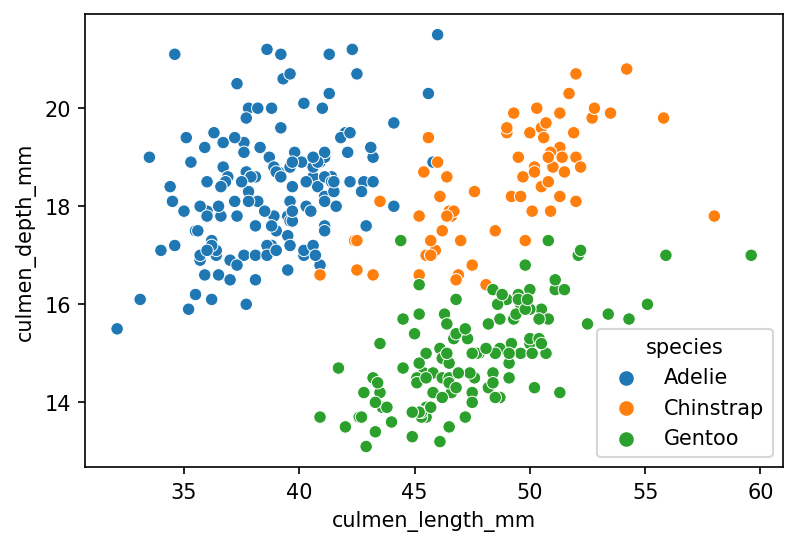

In [141]:
plt.figure(figsize=(6,4),dpi=150)
sns.scatterplot(x='culmen_length_mm',y='culmen_depth_mm',data=penguins,hue='species')
plt.show()

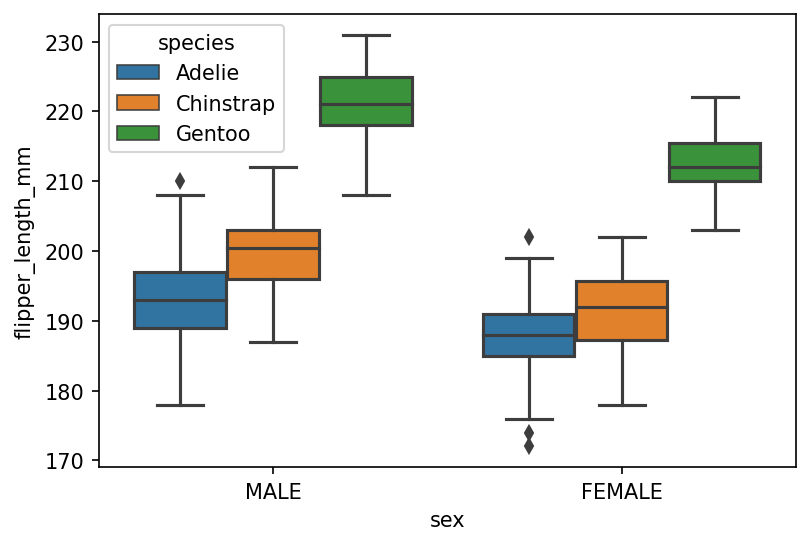

In [144]:
plt.figure(figsize=(6,4),dpi=150)
sns.boxplot(x='sex',y='flipper_length_mm',data=penguins,hue='species')
plt.show()

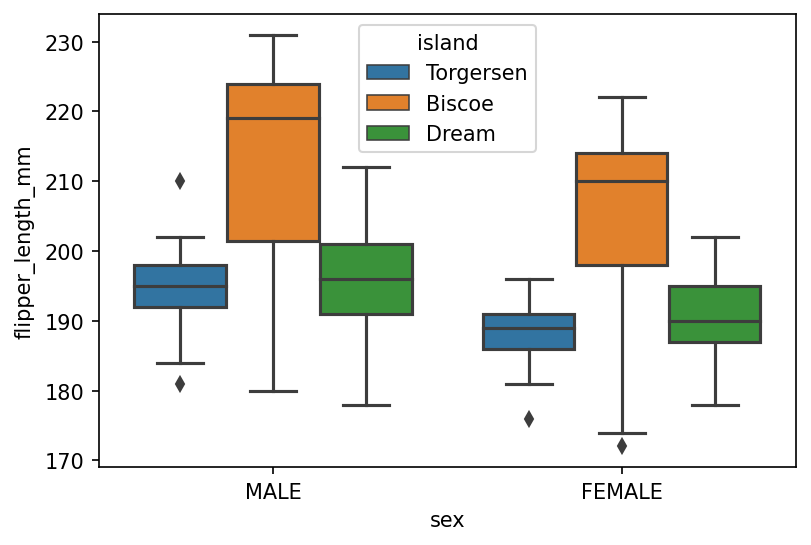

In [145]:
plt.figure(figsize=(6,4),dpi=150)
sns.boxplot(x='sex',y='flipper_length_mm',data=penguins,hue='island')
plt.show()

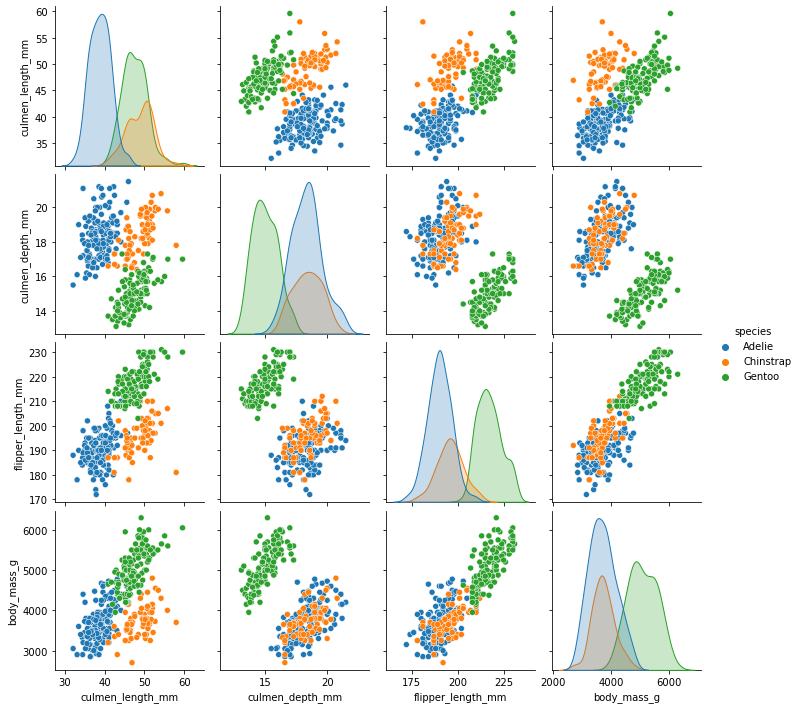

In [146]:
## pair plot
sns.pairplot(data=penguins,hue='species')
plt.show()

## #Feature Engineering

In [160]:
penguins.species.unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [161]:
X = pd.get_dummies(penguins.drop(columns='species',axis=1),drop_first=True)

In [162]:
y = penguins['species'].map({'Adelie':0,'Chinstrap':1,'Gentoo':2})

## #train test split data

In [163]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=101)

## Decision Tree Classifier default Hyperparamter

In [164]:
from sklearn.tree import DecisionTreeClassifier

In [165]:
tree_model = DecisionTreeClassifier()

In [166]:
tree_model.fit(X_train,y_train)

DecisionTreeClassifier()

In [167]:
ypred = tree_model.predict(X_test)

## #Model Evaluation

In [179]:
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix

In [169]:
confusion_matrix(y_test,ypred)

array([[21,  1,  0],
       [ 2, 13,  0],
       [ 0,  0, 14]], dtype=int64)

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


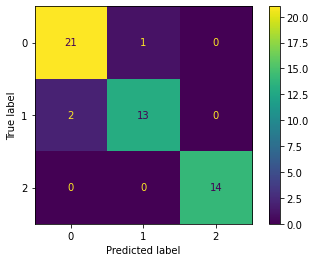

In [180]:
plot_confusion_matrix(tree_model,X_test,y_test)

In [170]:
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93        22
           1       0.93      0.87      0.90        15
           2       1.00      1.00      1.00        14

    accuracy                           0.94        51
   macro avg       0.95      0.94      0.94        51
weighted avg       0.94      0.94      0.94        51



## #plot tree

In [171]:
from sklearn.tree import plot_tree

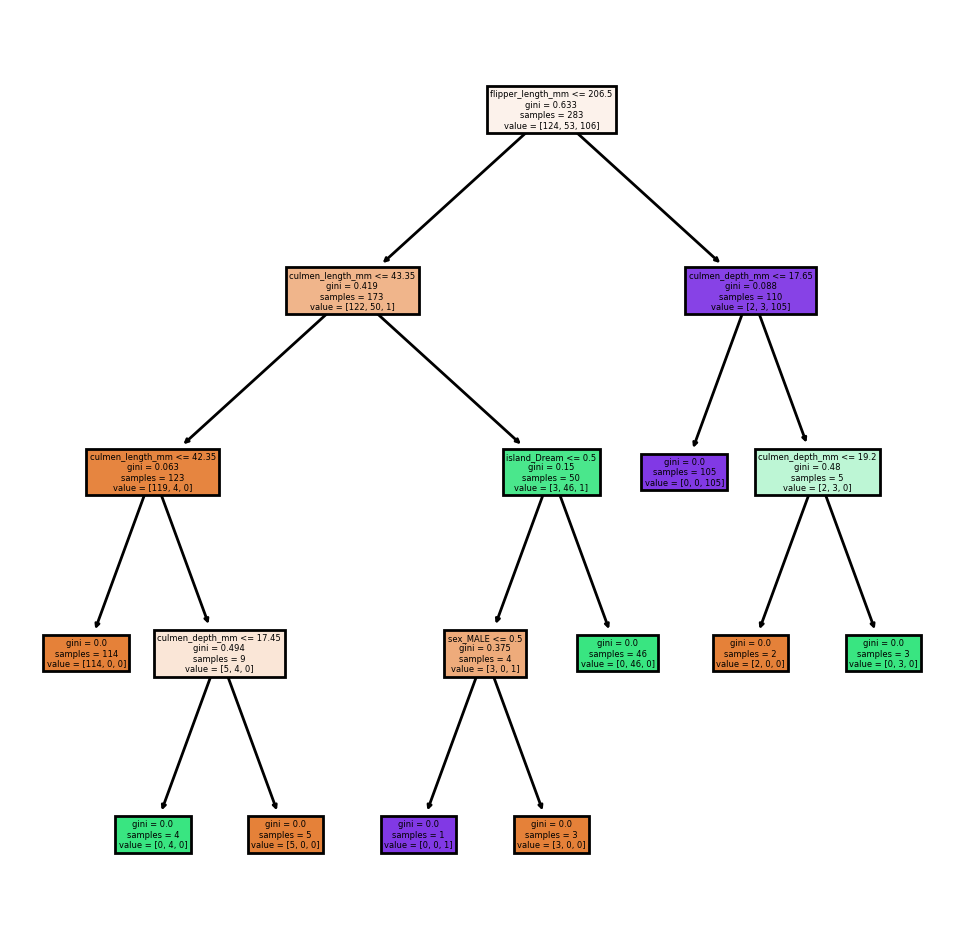

In [178]:
plt.figure(figsize=(6,6),dpi=200)
plot_tree(tree_model,filled=True,feature_names=X.columns);
plt.show()

## #Best Decision Tree 

In [193]:
def report_model(model):
    model_preds = model.predict(X_test)
    print(classification_report(y_test,model_preds))
    print('\n')
    plt.figure(figsize=(12,8),dpi=150)
    plot_tree(model,filled=True,feature_names=X.columns);

# #max depth


In [185]:
#max depth of tree is 3
b_tree = DecisionTreeClassifier(max_depth=3)
b_tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

              precision    recall  f1-score   support

           0       0.95      0.95      0.95        22
           1       0.93      0.93      0.93        15
           2       1.00      1.00      1.00        14

    accuracy                           0.96        51
   macro avg       0.96      0.96      0.96        51
weighted avg       0.96      0.96      0.96        51





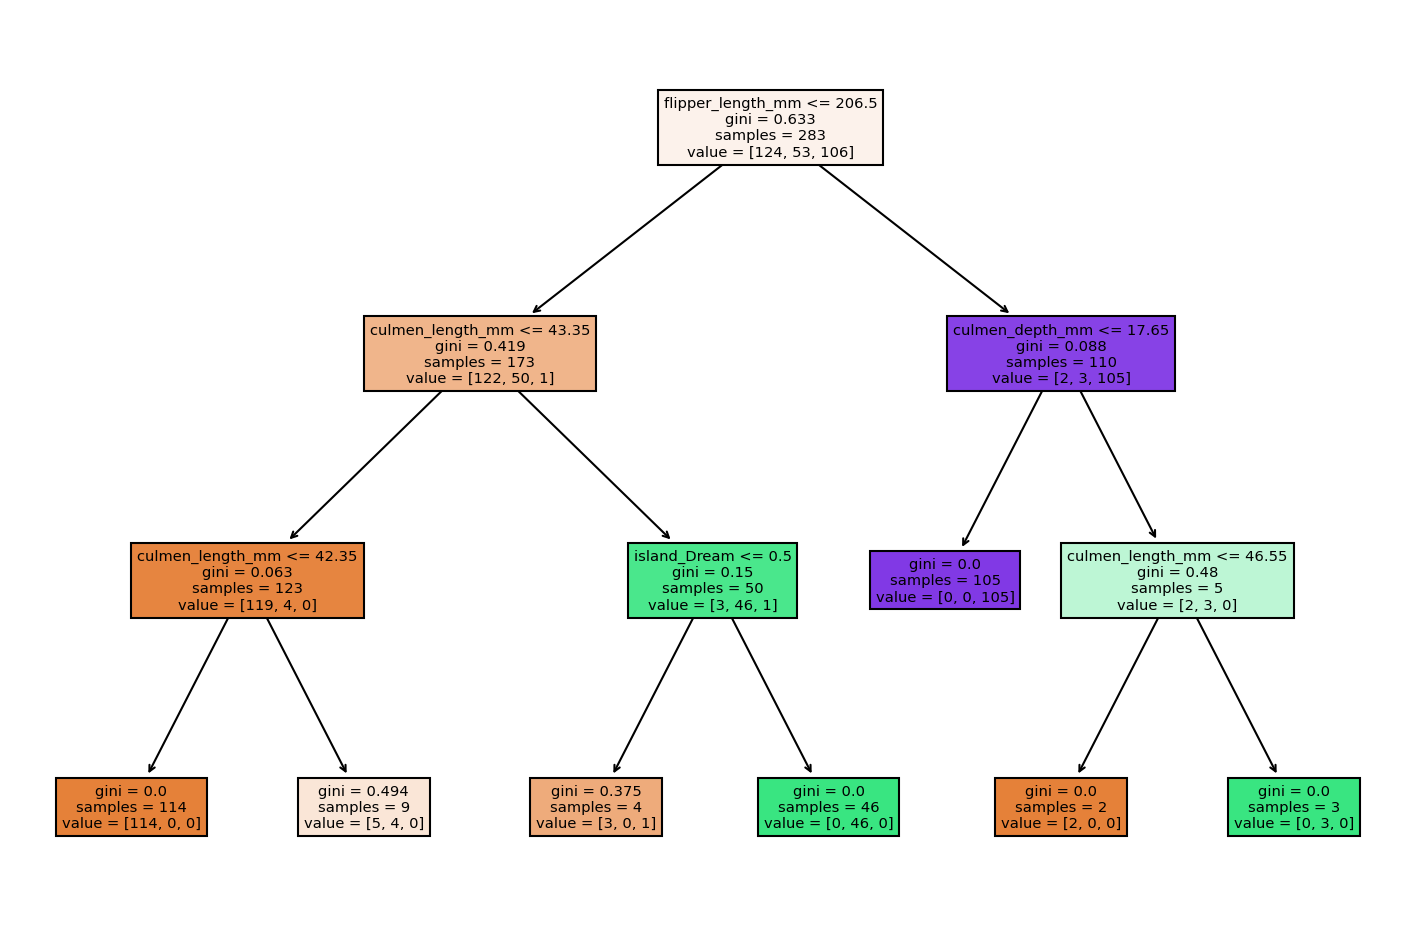

In [194]:
report_model(b_tree)

In [ ]:
## #Max leaf Node

In [196]:
l_tree = DecisionTreeClassifier(max_leaf_nodes=3)
l_tree.fit(X_train,y_train)

DecisionTreeClassifier(max_leaf_nodes=3)

              precision    recall  f1-score   support

           0       0.95      0.95      0.95        22
           1       0.92      0.80      0.86        15
           2       0.88      1.00      0.93        14

    accuracy                           0.92        51
   macro avg       0.92      0.92      0.92        51
weighted avg       0.92      0.92      0.92        51





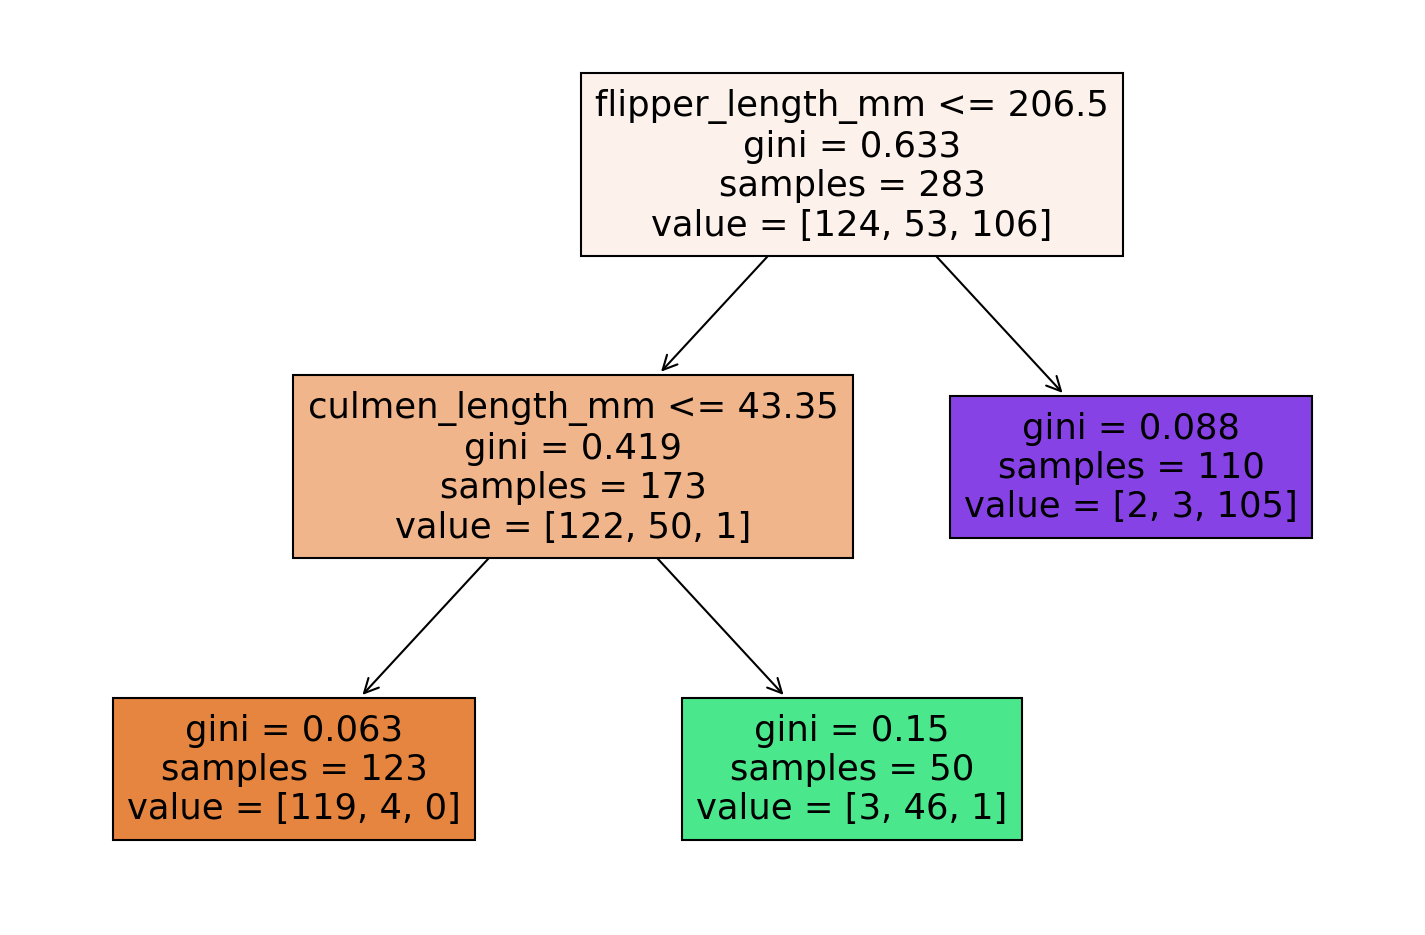

In [197]:
report_model(l_tree)

In [198]:
help(DecisionTreeClassifier)

Help on class DecisionTreeClassifier in module sklearn.tree._classes:

class DecisionTreeClassifier(sklearn.base.ClassifierMixin, BaseDecisionTree)
 |  DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)
 |  
 |  A decision tree classifier.
 |  
 |  Read more in the :ref:`User Guide <tree>`.
 |  
 |  Parameters
 |  ----------
 |  criterion : {"gini", "entropy"}, default="gini"
 |      The function to measure the quality of a split. Supported criteria are
 |      "gini" for the Gini impurity and "entropy" for the information gain.
 |  
 |  splitter : {"best", "random"}, default="best"
 |      The strategy used to choose the split at each node. Supported
 |      strategies are "best" to choose the best split and "random" to choose
 |      the best random split.
 |  
 |  max_d

## #entropy

In [199]:
tree_model = DecisionTreeClassifier(criterion='entropy')

In [200]:
tree_model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

              precision    recall  f1-score   support

           0       0.95      0.95      0.95        22
           1       0.93      0.93      0.93        15
           2       1.00      1.00      1.00        14

    accuracy                           0.96        51
   macro avg       0.96      0.96      0.96        51
weighted avg       0.96      0.96      0.96        51





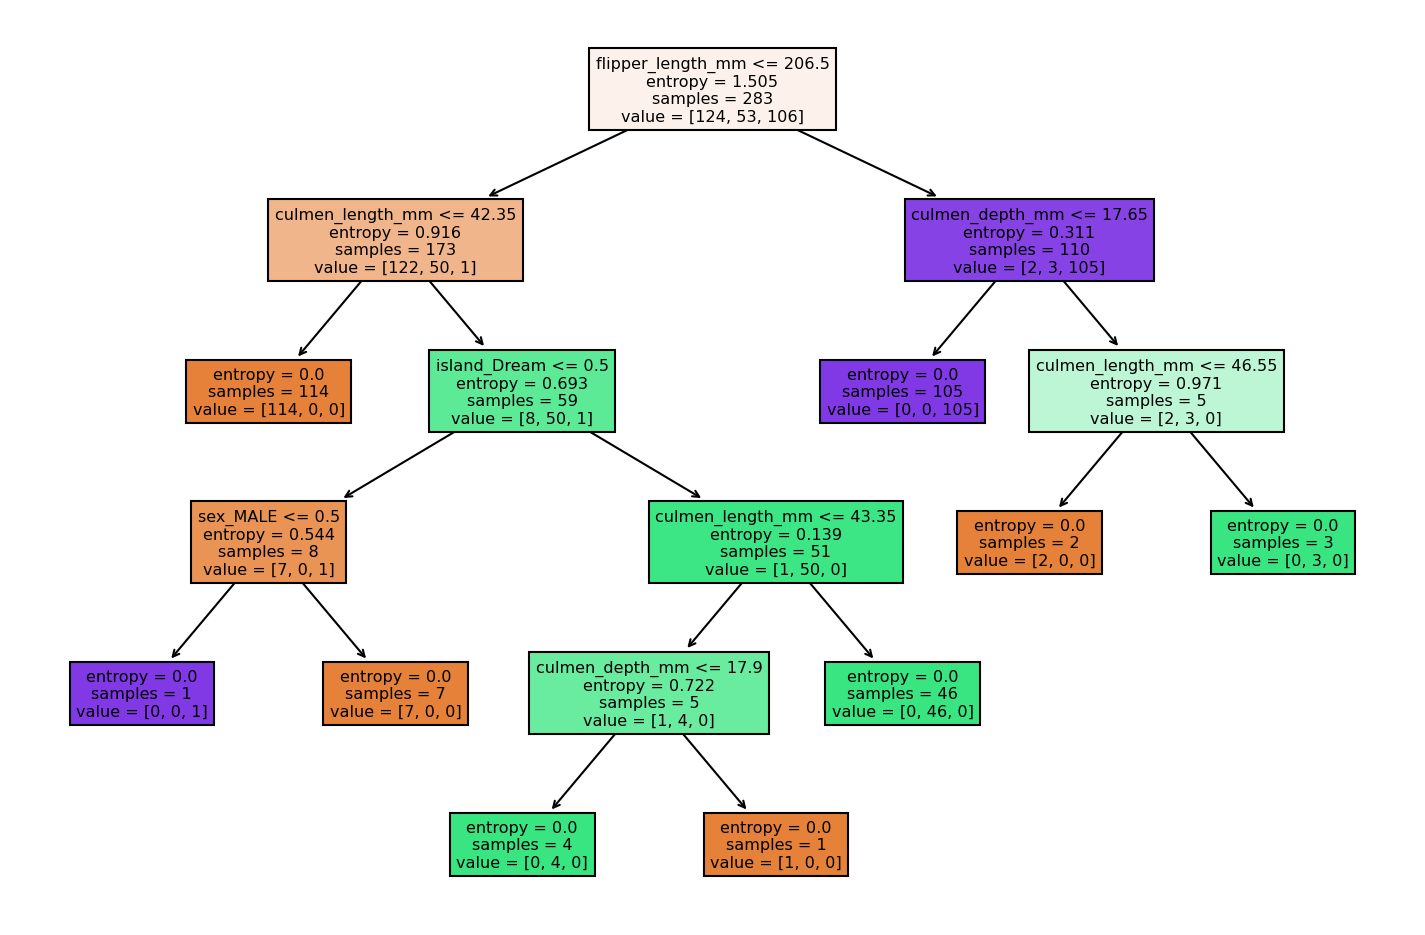

In [201]:
report_model(tree_model)